# Count of Individuals - Plants

## 1. Preliminary

In [1]:
#Installing Rasterio to access geospatial raster data

!pip install rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 35.5 MB/s eta 0:00:00


In [2]:
#Importing the libraries that will be used:

import rasterio
import numpy as np
from matplotlib import pyplot as plt
import cv2
from skimage import io

In [3]:
#Mount Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
path = '/content/drive/MyDrive/droneRGB.tif'

Let's open the file and convert it to a numpy array and then convert the floating image to uint8 making it OpenCV compatible

In [5]:
src = rasterio.open(path)
img = src.read()
img = img.transpose([1,2,0])
img = img.astype('uint8')

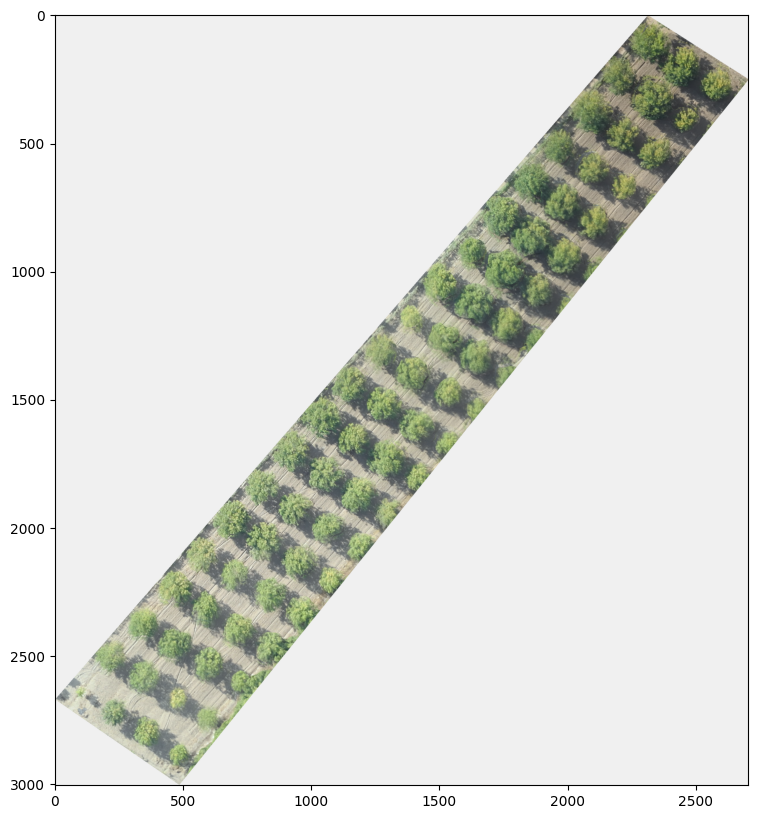

In [8]:
plt.figure(figsize=[10,10])
plt.imshow(img)

## 2. Applying Vegetation Index

The operations that will be presented below are commonly used on binary images. As we are working with a 3-channel image, let's use some vegetation index to enhance these areas of the image:

In [9]:
#Separating the R, G and B channels:

R = img[:,:,0]
G = img[:,:,1]
B = img[:,:,2]

In [10]:
ExG = 2*G - R - B

(-0.5, 2705.5, 3003.5, -0.5)

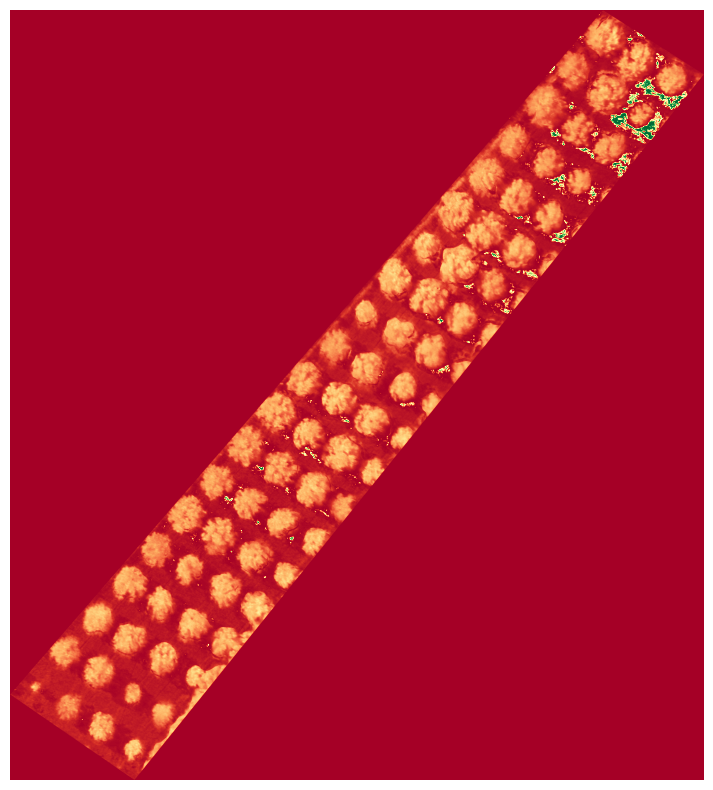

In [11]:
plt.figure(figsize=[10,10])
plt.imshow(ExG,cmap='RdYlGn')
plt.axis('off')

## 3. Binarization

Now we will use Bimodal histogram to generate a binary image, separating vegetation and non-vegetation values:

The minimum threshold separates the image values according to the image histogram. It looks for the minimum value that separates the first two peaks of the histogram:

In [12]:
from skimage.filters import threshold_minimum
thresh_min = threshold_minimum(ExG)
binary_min = ExG > thresh_min

Let's graph the resulting binary image:

(-0.5, 2705.5, 3003.5, -0.5)

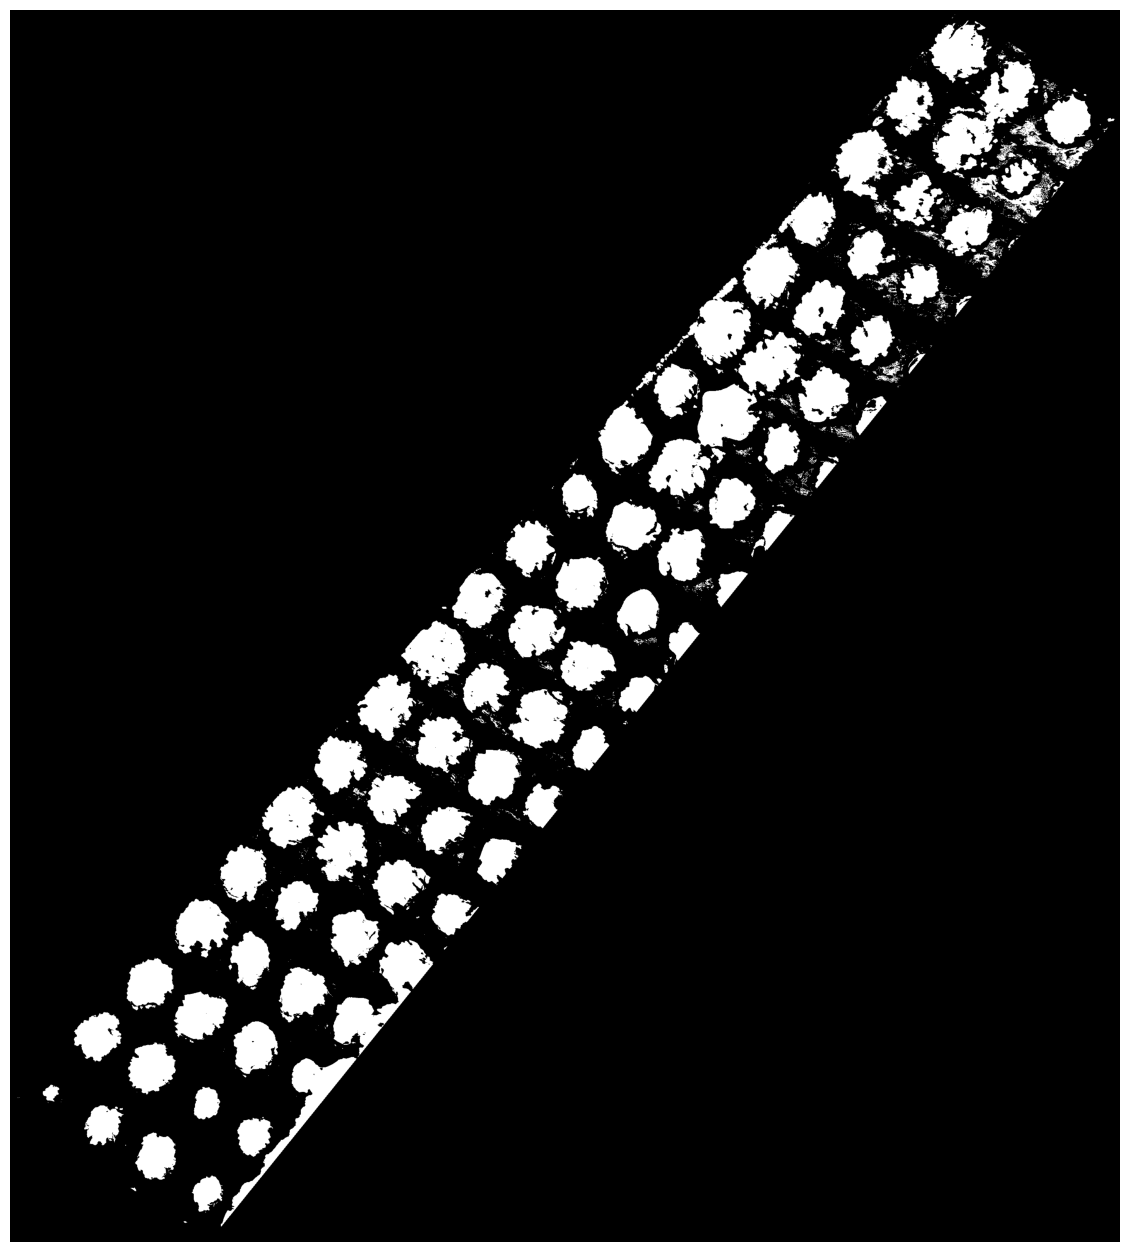

In [13]:
plt.figure(figsize=[16,16])
plt.imshow(binary_min,cmap=plt.cm.gray)
plt.axis('off')

Finally, we'll convert the Boolean image to the values 0 and 1:

In [14]:
binary = binary_min.astype('uint8')

## 4. Morphological Operations

We will use erosion and dilation operations to reduce the area around each plant in the original binary image.

We first define a 5x5 Kernel:

In [15]:
kernel = np.ones((5,5),np.uint8)

In [70]:
erosion_1 = cv2.erode(binary,kernel,iterations = 8)

In [71]:
dilation = cv2.dilate(erosion_1,kernel,iterations = 7)

In [80]:
erosion_2 = cv2.erode(dilation,kernel,iterations = 4)

After several erosion and dilation operations, we have unique elements in the image, according to the plot:

(-0.5, 2705.5, 3003.5, -0.5)

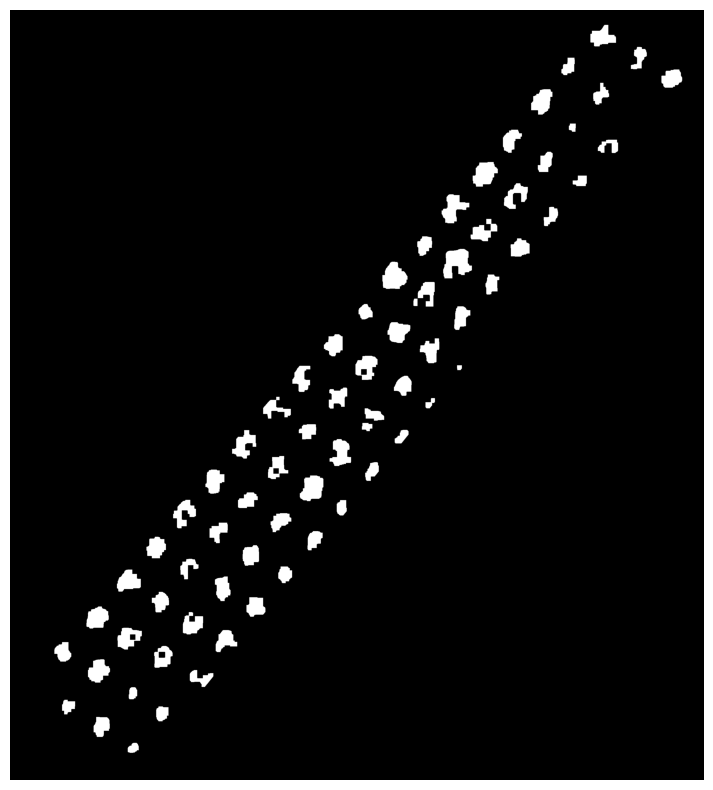

In [81]:
plt.figure(figsize=[10,10])
plt.imshow(erosion_2,cmap=plt.cm.gray)
plt.axis('off')

## 5. Counting

Thus, we can use the connecteComponents function to create a unique index for each image element:

In [82]:
num_labels, labels_im = cv2.connectedComponents(erosion_2)

In [83]:
num_labels

73